In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#使用numpy生成200个随机点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise=np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise

In [5]:
#定义两个placeholder存放输入数据,x用于存放输入特征，y用于存放输入标签。
# 用于存放输入数据，数据类型为float32，形状为[None,1],表示任意数量的样本，每个样本有一个标签。
x=tf.compat.v1.placeholder(tf.float32,[None,1])
y=tf.compat.v1.placeholder(tf.float32,[None,1])

In [18]:
#定义神经网络中间层
Weights_L1=tf.Variable(tf.random.normal([1,10]))
biases_L1=tf.Variable(tf.zeros([1,10]))    #加入偏置项
Wx_plus_b_L1=tf.matmul(x,Weights_L1)+biases_L1
L1=tf.nn.tanh(Wx_plus_b_L1)   #加入激活函数

In [19]:
#定义神经网络输出层
Weights_L2=tf.Variable(tf.random.normal([10,1]))
biases_L2=tf.Variable(tf.zeros([1,1]))  #加入偏置项
Wx_plus_b_L2=tf.matmul(L1,Weights_L2)+biases_L2
prediction=tf.nn.tanh(Wx_plus_b_L2)   #加入激活函数

In [20]:
#定义损失函数（均方差函数）
loss=tf.reduce_mean(tf.square(y-prediction))
#定义反向传播算法（使用梯度下降算法训练）
train_step=tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)

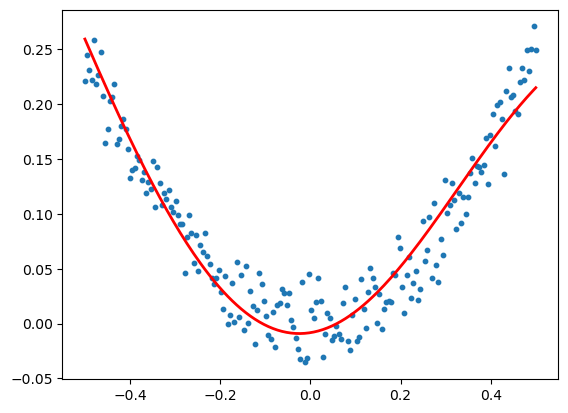

In [25]:
with tf.compat.v1.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    #训练2000次
    for i in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
 
    #获得预测值
    prediction_value=sess.run(prediction,feed_dict={x:x_data})
 
    #画图
    plt.figure()
    plt.scatter(x_data,y_data,s=10)   #散点是真实值
    plt.plot(x_data,prediction_value,'r-',lw=2)   #曲线是预测值
    plt.show()
